In [1]:
from missile import Missile2D
from missile_gym import MissileGym
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed
import ipywidgets
from matplotlib.pylab import figure, subplot2grid

In [6]:
missile_opts = {
    'd': 0.240,
    'm_0': 167,
    't_marsh': 6,
    'w_marsh': 55,
    'P_marsh': 22.5e3,
    'r_kill': 50,
    'alpha_max': 12,
    'xi': 0.5,
    'am': 6,
    'dny': 1,
    'init_conditions': {'V_0': 25, 'pos_0': (0, 0)}
}  
# vel_max

In [17]:
trg_pos = (10e3, 5e3)
trg_vel = (-280, 25)

In [22]:
sim_scenario = MissileGym.make_simple_scenario(missile_opts, trg_pos, trg_vel, tau=0.05, t_max=100, n=10)

Meeting point: False


In [23]:
%time res_hit = MissileGym.launch(sim_scenario) # aero=False, record=True, desc=True

info = target destroyed
Wall time: 15.8 s


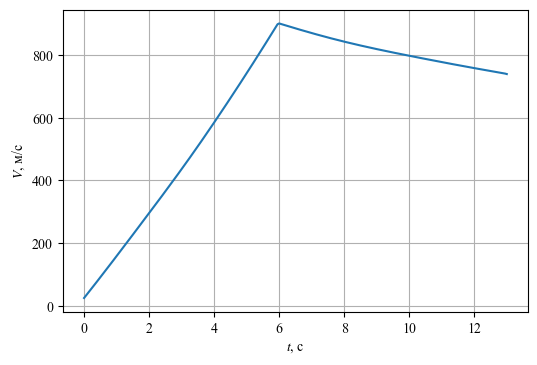

In [24]:
plt.figure(dpi=100)
plt.plot(res_hit['t'], res_hit['missile']['v'])
plt.ylabel('$V$, м/с')
plt.xlabel('$t$, с')
plt.grid()
plt.show()

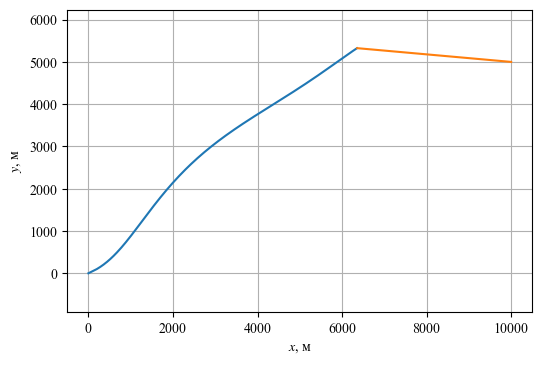

In [25]:
%matplotlib inline
plt.figure(dpi=100)
plt.plot(res_hit['missile']['x'], res_hit['missile']['y'])
plt.plot(res_hit['target']['x'], res_hit['target']['y'])
plt.grid()
plt.ylabel('$y$, м')
plt.xlabel('$x$, м')
plt.axis('equal')
plt.show()

In [26]:
@interact(i=ipywidgets.IntSlider(description='tau', max=len(res_hit['t'])-1, step=1, value=len(res_hit['t'])-1))
def draw_gym_hit(i):
    
    plt.figure(figsize=(16,12))
    
    ax01 = subplot2grid((8, 4), (0, 0), colspan=4, rowspan=4)
    ax02 = subplot2grid((8, 4), (4, 0), colspan=2, rowspan=2)
    ax03 = subplot2grid((8, 4), (6, 0), colspan=2, rowspan=2,sharex=ax02)
    ax04 = subplot2grid((8, 4), (4, 2), colspan=2, rowspan=2,sharex=ax02)
    ax05 = subplot2grid((8, 4), (6, 2), colspan=2, rowspan=2,sharex=ax02)
    
    ax01.plot(res_hit['missile']['x'][:i], res_hit['missile']['y'][:i], lw=3, ls=':', color='k', label='траектория ракеты')
    ax01.plot(res_hit['target']['x'][:i], res_hit['target']['y'][:i], lw=3, ls=':', color='red', label='траектория цели')
    ax01.tick_params(labelsize=12, pad = 0)
    ax01.legend(loc='best', fontsize=14)
    ax01.grid(True)
    
    ax02.plot(res_hit['t'][:i], res_hit['missile']['v'][:i], label='$V_р$', c='k')
    ax02.plot(res_hit['t'][:i], res_hit['target']['v'][:i], label='$V_ц$', c='red')
    ax02.tick_params(left=True, labelleft=True,labelbottom=False, bottom=False, right=False, labelright=False, labelsize=12)
    ax02.legend(fontsize=14)
    ax02.grid(True)
    
    ax03.plot(res_hit['t'][:i], res_hit['missile']['ny'][:i], label=r'$n_y$ ракеты', c='k')
    ax03.plot(res_hit['t'][:i], res_hit['missile']['nx'][:i], label=r'$n_x$ ракеты', c='k', ls='--')
    ax03.plot(res_hit['t'][:i], res_hit['target']['ny'][:i], label=r'$n_y$ цели', c='red')
    ax03.plot(res_hit['t'][:i], res_hit['target']['nx'][:i], label=r'$n_x$ цели', c='red', ls='--')
    ax03.legend(loc='best', ncol=2, fontsize=14)
    ax03.tick_params(left=True, labelleft=True, right=False, labelright=False, labelsize=12)
    ax03.grid(True)
    
    ax04.plot(res_hit['t'][:i], res_hit['missile']['alpha'][:i], label=r'$\alpha$', color='k')
    ax04.plot(res_hit['t'][:i], res_hit['alpha_targeting'][:i], label=r'$\alpha_{пот}$', color='darkorange', ls='-')
    ax04.tick_params(left=False, labelleft=False, labelbottom=False, bottom=False, right=True, labelright=True, labelsize=12)
    ax04.legend(fontsize=14)
    ax04.grid(True)
       
    ax05.plot(res_hit['t'][:i], res_hit['missile']['Q'][:i], color='k', label='Q')
    ax05.tick_params(left=False, labelleft=False, right=True, labelright=True, labelsize=12)
    ax05.legend(fontsize=14)
    ax05.grid(True)
    
#     plt.savefig('pictures/Баллистика.png', dpi=900, bbox_inches='tight')
    
    plt.show()

interactive(children=(IntSlider(value=260, description='tau', max=260), Output()), _dom_classes=('widget-inter…